In [1]:
from DQN import DQN
from datetime import datetime
import matplotlib.pyplot as plt
import gym
from gym import wrappers
import numpy as np
from time import time

In [2]:
env = gym.make('LunarLander-v2')

In [3]:
filename = "DQN"
dqn = DQN(env=env, weight_file=filename,
    epsilon=1, epsilon_decay=0.99, epsilon_cutoff=0.05, 
    alpha=0.001, gamma=0.99, numEpisodes=1001,
    memorySize=100000, startMemSize=5000,
    stepSize=100, batchSize=32)
dqn.createANNModel((256, 128, 64))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
*********** no weights loaded ***********
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 43,716
Trainable params: 43,716
Non-trainable params: 0
_________________________________________________________________


In [4]:
print("\n*****Start time: ", datetime.now().time())
dqn.trainDQN(10)
print("\n*****Finish time: ", datetime.now().time())


*****Start time:  17:56:36.291543

episode 10: loss-->12.94+/-15.24, reward-->-167.87+/-74.83

episode 20: loss-->3.72+/-4.98, reward-->-141.25+/-51.54

episode 30: loss-->23.72+/-23.91, reward-->-84.14+/-33.63

episode 40: loss-->10.31+/-12.14, reward-->-64.37+/-37.28

episode 50: loss-->5.36+/-2.35, reward-->-67.34+/-25.89

episode 60: loss-->8.84+/-8.23, reward-->-71.95+/-60.06

episode 70: loss-->46.93+/-63.66, reward-->-61.32+/-33.50

episode 80: loss-->2.29+/-1.16, reward-->-72.48+/-107.22

episode 90: loss-->12.78+/-21.37, reward-->-53.10+/-65.77

episode 100: loss-->11.77+/-10.52, reward-->-62.42+/-71.20

episode 110: loss-->3.19+/-1.77, reward-->-88.75+/-94.21

episode 120: loss-->4.18+/-6.12, reward-->-164.38+/-101.05

episode 130: loss-->21.47+/-26.20, reward-->6.46+/-55.06

episode 140: loss-->12.89+/-19.79, reward-->-61.49+/-63.96

episode 150: loss-->2.93+/-1.87, reward-->-53.36+/-90.27

episode 160: loss-->2.73+/-0.92, reward-->-44.94+/-144.93

episode 170: loss-->18.49

Text(0, 0.5, 'training error')

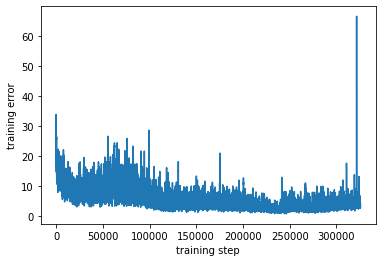

In [5]:
losses = dqn.training_losses
loss_ave = []
loss_std = []
for i in range(len(losses)-100):
  loss_ave.append(np.average(losses[i: i+100]))
  loss_std.append(np.std(losses[i: i+100]))
plt.plot(loss_ave)
plt.xlabel("training step")
plt.ylabel("training error")

Text(0, 0.5, 'reward')

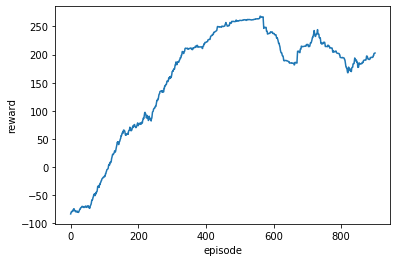

In [6]:
rewards = dqn.training_rewards
reward_ave = []
reward_std = []
for i in range(len(rewards)-100):
  reward_ave.append(np.average(rewards[i: i+100]))
plt.plot(reward_ave)
plt.xlabel("episode")
plt.ylabel("reward")

In [11]:
env = wrappers.Monitor(env, './videos/' + str(time()) + '/')
dqn.env = env
dqn.runOneEpisode(0, render=True, train=False)

233.1002002234952

In [12]:
env.close()